# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
country_codes = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

595

In [3]:
# Seting parameters to access the wheather data
## Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

## Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
# Setting up lists to hold reponse info
city_list = []
country_list = []
temperature_c = []
humidity_perc = []
cloudiness_perc = []
wind_speed_kph = []
latitude = []
longitude = []
date = []
counter = 1
# Loop through the list of cities and perform a request for data on each

for city in cities:
    
    try:
        print(f"Gathering info for city #{counter} | {city}")
        response = requests.get(query_url + city).json()
        city_list.append(response['name'])
        country_list.append(response['sys']['country'])
        latitude.append(response['coord']['lat'])
        longitude.append(response['coord']['lon'])
        temperature_c.append(response['main']['temp'])
        humidity_perc.append(response['main']['humidity'])
        cloudiness_perc.append(response['clouds']['all'])
        wind_speed_kph.append(response['wind']['speed'])
        date.append(response['dt'])
        counter = counter+1
        
    except (KeyError, IndexError):
        print("------------")
        print("City not found... Skipping...")
        counter = counter+1
    print("------------")

Gathering info for city #1 | lagoa
------------
Gathering info for city #2 | ushuaia
------------
Gathering info for city #3 | muroto
------------
Gathering info for city #4 | amderma
------------
City not found... Skipping...
------------
Gathering info for city #5 | bairiki
------------
City not found... Skipping...
------------
Gathering info for city #6 | laguna
------------
Gathering info for city #7 | katikati
------------
Gathering info for city #8 | fukue
------------
Gathering info for city #9 | vaini
------------
Gathering info for city #10 | gat
------------
Gathering info for city #11 | muskegon heights
------------
Gathering info for city #12 | new norfolk
------------
Gathering info for city #13 | ancud
------------
Gathering info for city #14 | albany
------------
Gathering info for city #15 | tasiilaq
------------
Gathering info for city #16 | novoagansk
------------
Gathering info for city #17 | hornepayne
------------
Gathering info for city #18 | kapaa
------------
G

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [14]:
dates = []
for x in date:
    dates.append(time.ctime(x))

In [15]:
weather_info = {
    "City" : city_list,
    "Country" : country_list,     
    "Temperature (C)"   : temperature_c,
    "Humidity (%)"   : humidity_perc,
    "Cloudiness (%)" : cloudiness_perc,
    "Wind Speed (mps)"  : wind_speed_kph,
    "Latitude"        : latitude,
    "Longitude"       : longitude,
    "Date"            : dates

}
weather_data = pd.DataFrame(weather_info)
weather_data.head()

,City,Country,Temperature (C),Humidity (%),Cloudiness (%),Wind Speed (mps),Latitude,Longitude,Date
0,Lagoa,PT,21.00,43,0,5.70,37.14,-8.45,Mon Aug 19 19:18:13 2019
1,Ushuaia,AR,4.00,93,0,2.10,-54.81,-68.31,Mon Aug 19 19:15:59 2019
2,Muroto,JP,25.00,94,75,0.50,33.37,134.14,Mon Aug 19 19:18:13 2019
3,Laguna,BZ,31.00,66,20,3.10,16.17,-88.94,Mon Aug 19 19:18:29 2019
4,Katikati,NZ,12.96,91,60,4.95,-37.55,175.92,Mon Aug 19 19:18:29 2019


In [29]:
# Save the data frame
weather_data.to_csv("../starter_code/weather_data.csv", index = None)

In [16]:
weather_data.count()

City                538
Country             538
Temperature (C)     538
Humidity (%)        538
Cloudiness (%)      538
Wind Speed (mps)    538
Latitude            538
Longitude           538
Date                538
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

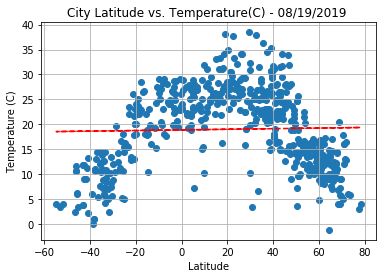

In [41]:

plt.scatter(weather_data['Latitude'], 
            weather_data['Temperature (C)'], 
            marker = "o")


plt.grid(True)
plt.title("City Latitude vs. Temperature(C) - 08/19/2019 ")
plt.xlabel("Latitude")
plt.ylabel("Temperature (C)")

reg_temperature = np.polyfit(weather_data['Latitude'], 
                             weather_data['Temperature (C)'], 
                             1)

temperature_hat = np.poly1d(reg_temperature)

plt.plot(weather_data['Latitude'],
         temperature_hat(weather_data['Latitude']),
         "r--")

# Save the Figure
plt.savefig("../Images/temp.png")
plt.show()

#### Latitude vs. Humidity Plot

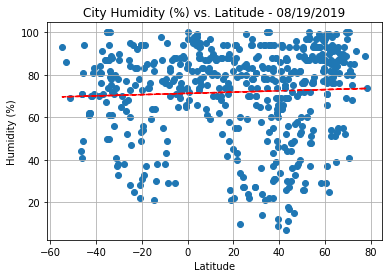

In [38]:
plt.scatter(weather_data['Latitude'], 
            weather_data['Humidity (%)'], 
            marker = "o")


plt.grid(True)
plt.title("City Humidity (%) vs. Latitude - 08/19/2019")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")


reg_humidity = np.polyfit(weather_data['Latitude'], 
                          weather_data['Humidity (%)'], 
                          1)

humidity_hat = np.poly1d(reg_humidity)

plt.plot(weather_data['Latitude'],
         humidity_hat(weather_data['Latitude']),
         "r--")


# Save the Figure
plt.savefig("../Images/humid.png")
plt.show()

#### Latitude vs. Cloudiness Plot

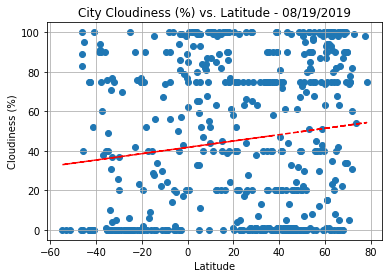

In [39]:
plt.scatter(weather_data['Latitude'], 
            weather_data['Cloudiness (%)'], 
            marker = "o")


plt.grid(True)
plt.title("City Cloudiness (%) vs. Latitude - 08/19/2019")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

reg_cloud = np.polyfit(weather_data['Latitude'], 
                       weather_data['Cloudiness (%)'], 
                       1)

cloudiness_hat = np.poly1d(reg_cloud)
plt.plot(weather_data['Latitude'],
         cloudiness_hat(weather_data['Latitude']),
         "r--")

# Save the Figure
plt.savefig("../Images/cloud.png")
plt.show()

#### Latitude vs. Wind Speed Plot

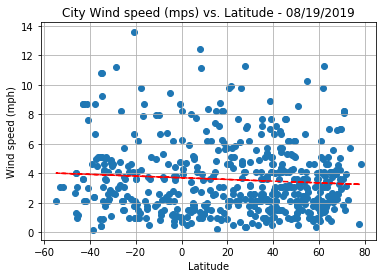

In [40]:
plt.scatter(weather_data['Latitude'], 
            weather_data['Wind Speed (mps)'], 
            marker = "o")


plt.grid(True)
plt.title("City Wind speed (mps) vs. Latitude - 08/19/2019")
plt.xlabel("Latitude")
plt.ylabel("Wind speed (mph)")

reg_wind_speed = np.polyfit(weather_data['Latitude'], 
                            weather_data['Wind Speed (mps)'], 
                            1)

reg_wind_hat = np.poly1d(reg_wind_speed)

plt.plot(weather_data['Latitude'], 
         reg_wind_hat(weather_data['Latitude']),
         "r--")


# Save the Figure
plt.savefig("../Images/wind.png")
plt.show()